In [3]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import analytic

import thinkstats2
import thinkplot

In [4]:
#bring in the data frame
df = pd.read_csv("shot_logs.csv")

In [5]:
#get basic summary stats - this really isn't helpful at all for the exercise
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


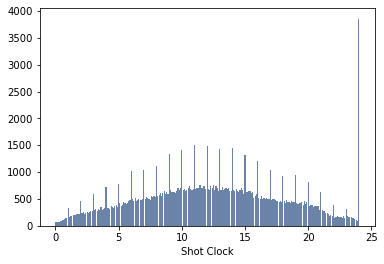

In [6]:
#histogram 1 - shot clock distribution
shotClock = thinkstats2.Hist(df.SHOT_CLOCK)
thinkplot.Hist(shotClock)
thinkplot.Config(xlabel='Shot Clock')
#outlier here appears to be at the 24 second mark. need to investigate whether that means that shots are taken more at the
#beginning of the shot clock or at the end as it expires. nothing needs to be excluded.

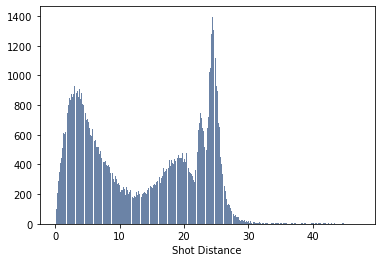

In [7]:
#histogram 2 - shot distance distribution
shotDistance = thinkstats2.Hist(df.SHOT_DIST)
thinkplot.Hist(shotDistance)
thinkplot.Config(xlabel='Shot Distance')
#seems to be a peak at around 27 feet, which is in line with the distance of the 3 pointer. 
#this means that people are taking their shots right behind the line instead of several feet behind it
#nothing needs to be excluded.

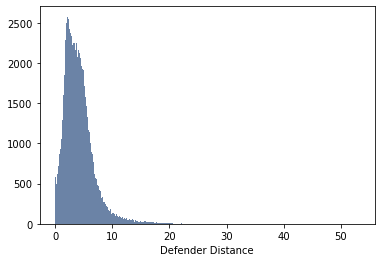

In [8]:
#histogram 3 - defender distance
defenderDistance = thinkstats2.Hist(df.CLOSE_DEF_DIST)
thinkplot.Hist(defenderDistance)
thinkplot.Config(xlabel='Defender Distance')
#not really any outliers here. anything beyond 15 feet could be considered an outlier but they are so rare that
#it doesn't really matter
#nothing needs to be excluded.

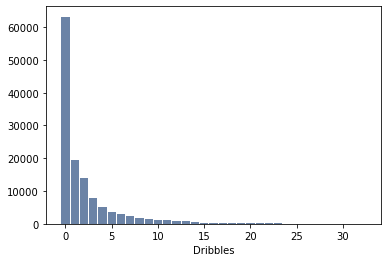

In [9]:
#histogram 4 - dribbles
dribbles = thinkstats2.Hist(df.DRIBBLES)
thinkplot.Hist(dribbles)
thinkplot.Config(xlabel='Dribbles')
#not really any outliers here. Looks like an exponential most, going in the wrong direction.
#nothing needs to be excluded.

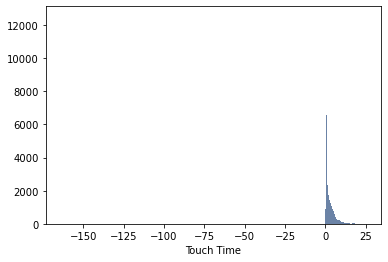

In [10]:
#histogram 5 - touch time
touchTime = thinkstats2.Hist(df.TOUCH_TIME)
thinkplot.Hist(touchTime)
axis = [0, 25, 0, 10000]
thinkplot.Config(xlabel='Touch Time')
#again, no outliers. Nothing beyond 24 seconds and nothing less than zero seconds, which is the length of the shot clock.
#all makes sense
#nothing needs to be excluded.

In [11]:
#summary statistics - mean, etc
df.describe(include='all')
#instead of isolating the 5 variables and doing the describe method on each, decided to just go with including all

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,...,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,...,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,...,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,...,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,...,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,...,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,...,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,...,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,...,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


In [12]:
#subset data into wins and losses only
dfMade = df["SHOT_RESULT"] == "made"
dfMade1 = df[dfMade]

In [13]:
dfMiss = df["SHOT_RESULT"] == "missed"
dfMiss1 = df[dfMiss]

In [14]:
dfMiss1
#pmfMade = thinkstats2.Pmf(dfMade.SHOT_CLOCK, label='make')
#pmfMiss = thinkstats2.Pmf(dfMiss, label='miss')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128059,21400033,"NOV 01, 2014 - BKN @ DET",A,W,12,4,4,8:34,19.8,0,...,22.7,3,missed,"Augustin, D.J.",201571,4.0,0,0,jarrett jack,101127
128060,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,1,1,1:59,11.4,16,...,12.6,2,missed,"Rondo, Rajon",200765,4.8,0,0,jarrett jack,101127
128061,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,2,2,10:10,19.0,0,...,7.4,2,missed,"Bradley, Avery",202340,2.7,0,0,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127


In [15]:
pmfMade = thinkstats2.Pmf(dfMade1.SHOT_CLOCK, label='make')

In [16]:
pmfMiss = thinkstats2.Pmf(dfMiss1.SHOT_CLOCK, label='miss')

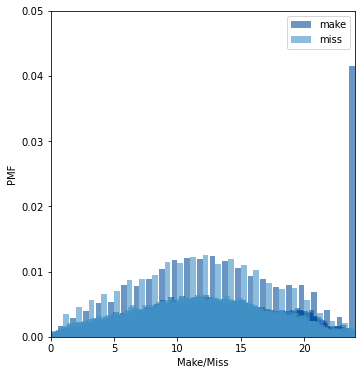

In [17]:
width=0.45
axis = [0, 24, 0, 0.05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfMade, align='right', width=width)
thinkplot.Hist(pmfMiss, align='left', width=width)
thinkplot.Config(xlabel='Make/Miss', ylabel='PMF', axis=axis)

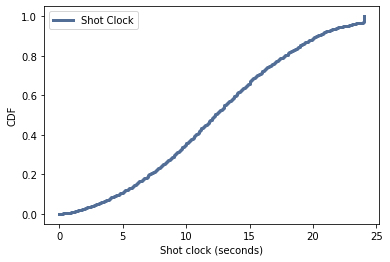

In [18]:
#cdf for shot clock variable. trends towards 100% the closer we get to 24s
cdf = thinkstats2.Cdf(df.SHOT_CLOCK, label='Shot Clock')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Shot clock (seconds)', ylabel='CDF', loc='upper left')

In [19]:
#For the analytical distribution, I am choosing the exponential logarithmic function to track the histogram associated
#with dribbles above. The two match perfectly.

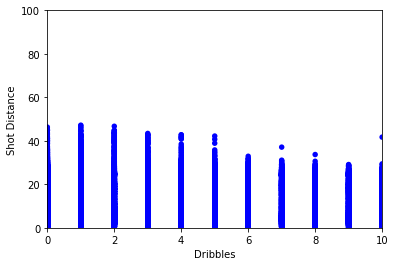

In [20]:
thinkplot.Scatter(df.DRIBBLES, df.SHOT_DIST, alpha=1)
thinkplot.Config(xlabel='Dribbles',
                 ylabel='Shot Distance',
                 axis=[0, 10, 0, 100],
                 legend=False)

#The point of this scatter plot was to pit the amount of dribbles vs Shot Distance. The goal was to see if 
#dribbling more created more space for the shot. It would appear that it does not. However, there is a slight 
#downward trend in distance as dribbles go up. It is not enough to say it is statistically significant.

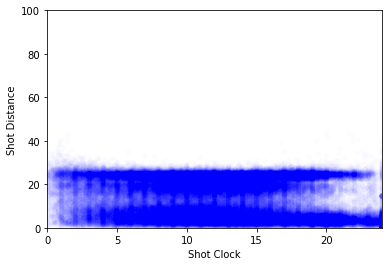

In [21]:
thinkplot.Scatter(df.SHOT_CLOCK, df.SHOT_DIST, alpha=0.01)
thinkplot.Config(xlabel='Shot Clock',
                 ylabel='Shot Distance',
                 axis=[0, 24, 0, 100],
                 legend=False)

In [22]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [23]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [24]:
Corr(df.DRIBBLES, df.SHOT_DIST)

-0.08253976119304532

In [25]:
#clearly, there is no correlation between the number of dribbles taken and the distance of the shot. If anything,
#they are very slightly negatively correlated. But the number is so close to zero that it is not a significant
#correlation.

In [26]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [27]:
SpearmanCorr(df.DRIBBLES, df.SHOT_DIST)

-0.14873830212272277

In [28]:
#same goes for spearman correlation. slightly negative but still close to zero, not statistically significant

In [29]:
dribbles, shotDist = df.DRIBBLES, df.SHOT_DIST
Cov(dribbles, shotDist)

-2.551588360418054

In [30]:
#These two variables have a negative covariance. 

In [31]:
#Hypothesis: there is a difference between average time left on shot clock when it comes to shot distance.
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [32]:
cleaned = df.dropna(subset=['SHOT_CLOCK', 'SHOT_DIST'])
data = cleaned.SHOT_CLOCK.values, cleaned.SHOT_DIST.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [33]:
#the p-value is 0.0 which is under the convention of 0.05.
ht.actual, ht.MaxTestStat()

(0.17302614320737528, 0.01228570511453393)

In [34]:
#Regression

import statsmodels.formula.api as smf

formula = 'SHOT_DIST ~ SHOT_CLOCK'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SHOT_DIST   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3781.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:06:32   Log-Likelihood:            -4.3805e+05
No. Observations:              122502   AIC:                         8.761e+05
Df Residuals:                  122500   BIC:                         8.761e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7253      0.059    284.403      0.000      16.610      16.841
SHOT_CLOCK    -0.2635      0.004    -61.487      0.000      -0.272      -0.255
==============================================================================
Omnibus:                   836554.946   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11078.549
Skew:                           0.102   Prob(JB):                         0.00
Kurtosis:                       1.541   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""